In [1]:
# 6.1 条形图
# install.packages("vcd")
# 6.1.1 简单的条形图

In [2]:
library(vcd)
counts <- table(Arthritis$Improved)
counts

Loading required package: grid




  None   Some Marked 
    42     14     28 

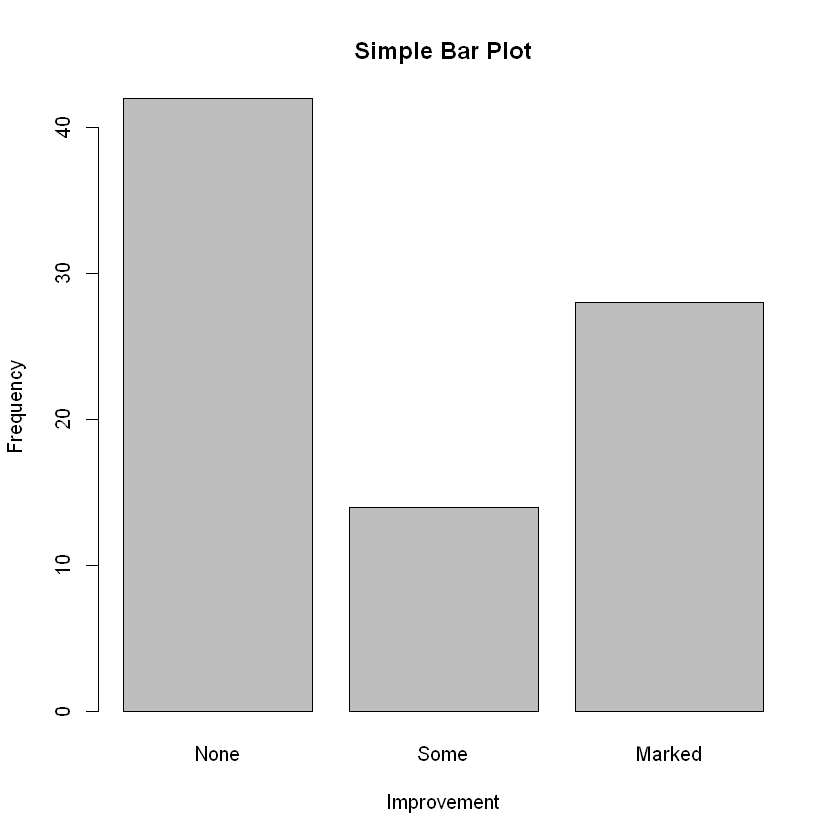

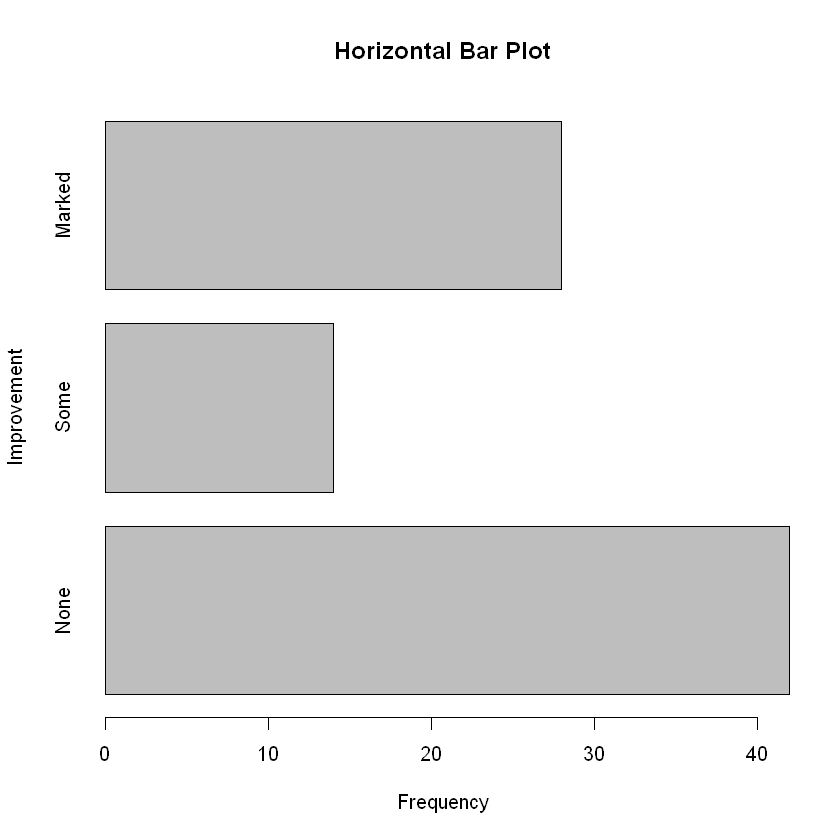

In [4]:
# 6-1 简单的条形图
barplot(counts,
 main="Simple Bar Plot",
 xlab="Improvement", ylab="Frequency") # 简单条形图
barplot(counts,
 main="Horizontal Bar Plot",
 xlab="Frequency", ylab="Improvement",
 horiz=TRUE) # 水平条形图

In [6]:
# 6.1.2 堆砌条形图和分组条形图
library(vcd)
counts <- table(Arthritis$Improved, Arthritis$Treatment)
counts

        
         Placebo Treated
  None        29      13
  Some         7       7
  Marked       7      21

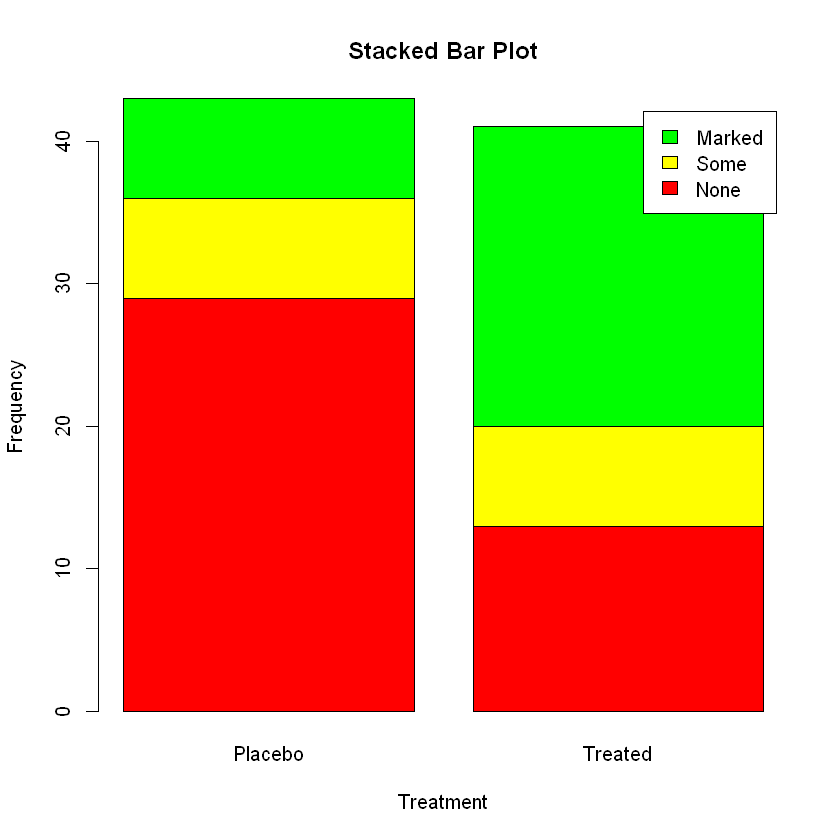

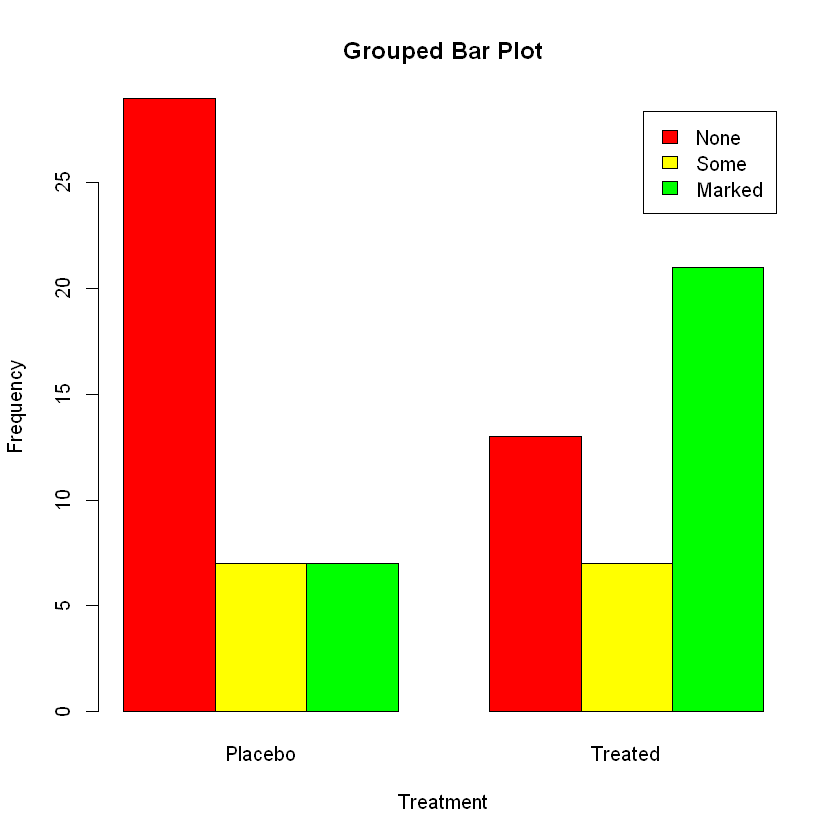

In [7]:
# 单6-2 堆砌条形图和分组条形图
barplot(counts,
 main="Stacked Bar Plot",
 xlab="Treatment", ylab="Frequency",
 col=c("red", "yellow","green"),
 legend=rownames(counts))# 堆砌条形图
barplot(counts,
 main="Grouped Bar Plot",
 xlab="Treatment", ylab="Frequency",
 col=c("red", "yellow", "green"),
 legend=rownames(counts), beside=TRUE)# 分组条形图

Group.1,x
<fct>,<dbl>
Northeast,1.000000
South,1.737500
North Central,0.700000
West,1.023077


,Group.1,x
,<fct>,<dbl>
3,North Central,0.700000
1,Northeast,1.000000
4,West,1.023077
2,South,1.737500


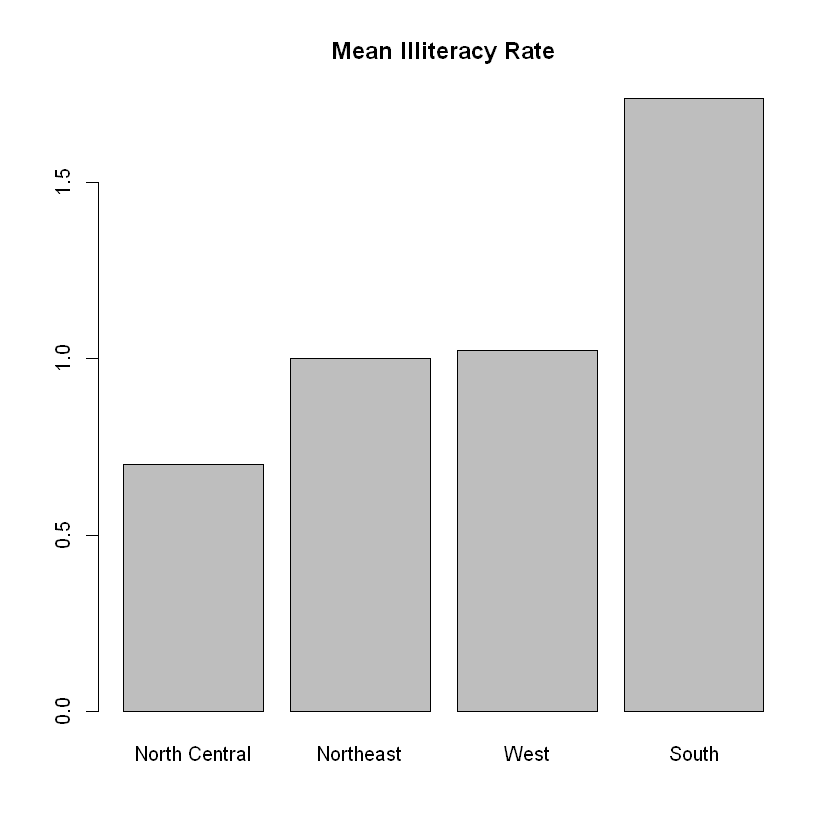

In [9]:
# 6.1.3 均值条形图
# 6-3 排序后均值的条形图
states <- data.frame(state.region, state.x77)
means <- aggregate(states$Illiteracy, by=list(state.region), FUN=mean)
means 
means <- means[order(means$x),]#将均值从小到大排序
means
barplot(means$x, names.arg=means$Group.1)
 title("Mean Illiteracy Rate")# 添加标题

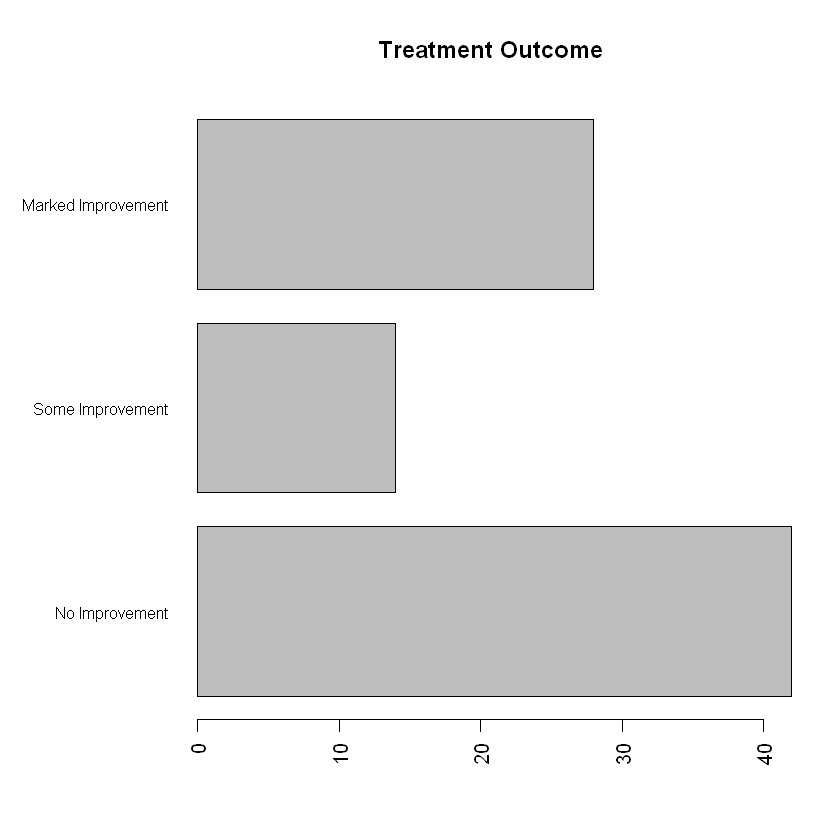

In [11]:
# 6.1.4 条形图的微调
# 6-4 为条形图搭配标签
par(mar=c(5,8,4,2))# 增加y边界的大小
par(las=2)#旋转条形的标签
counts <- table(Arthritis$Improved)
barplot(counts,
 main="Treatment Outcome",
 horiz=TRUE,
 cex.names=0.8,# 缩小字体大小，让标签更合适
 names.arg=c("No Improvement", "Some Improvement",
 "Marked Improvement"))#修改标签文本

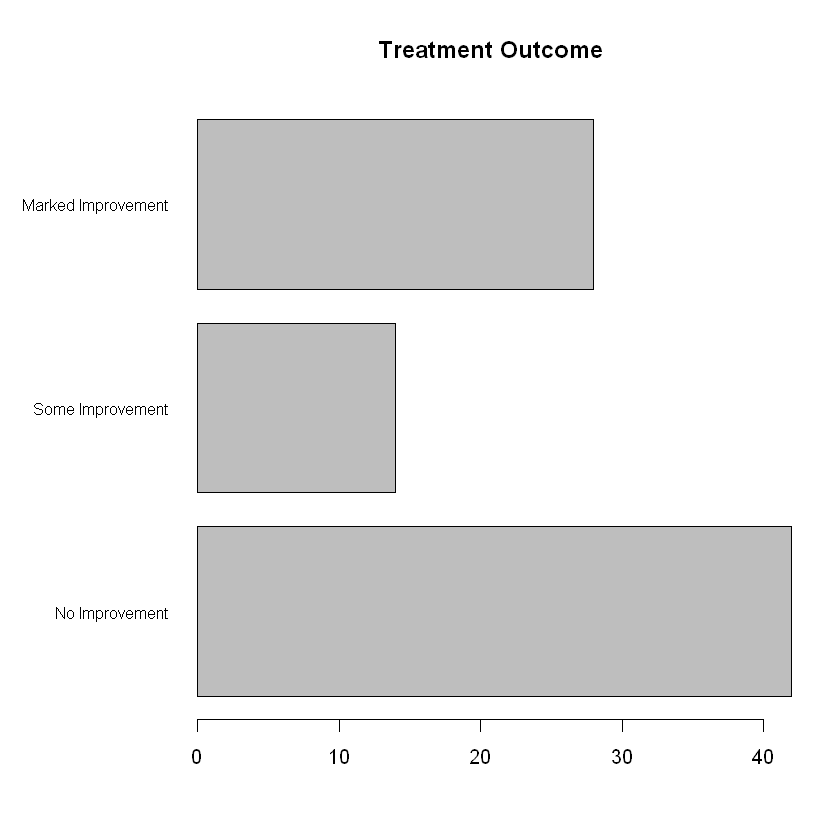

In [12]:
# 6.1.4 条形图的微调
# 6-4 为条形图搭配标签
par(mar=c(5,8,4,2))# 增加y边界的大小
par(las=1)#旋转条形的标签
counts <- table(Arthritis$Improved)
barplot(counts,
 main="Treatment Outcome",
 horiz=TRUE,
 cex.names=0.8,# 缩小字体大小，让标签更合适
 names.arg=c("No Improvement", "Some Improvement",
 "Marked Improvement"))#修改标签文本

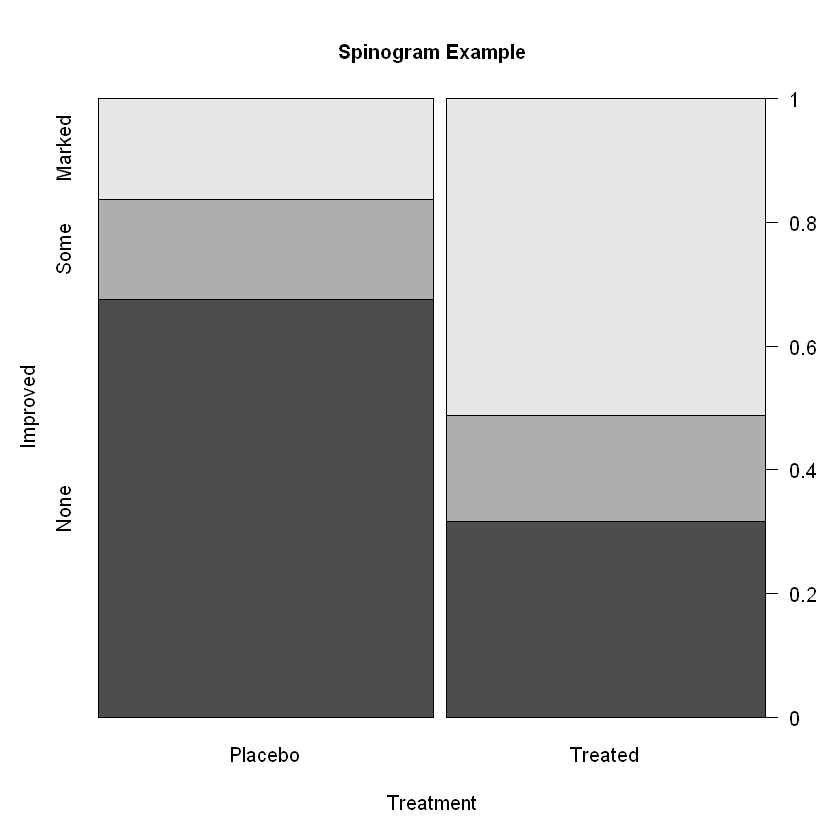

In [13]:
# 6.1.5 棘状图
library(vcd)
attach(Arthritis)
counts <- table(Treatment, Improved)
spine(counts, main="Spinogram Example")
detach(Arthritis) 

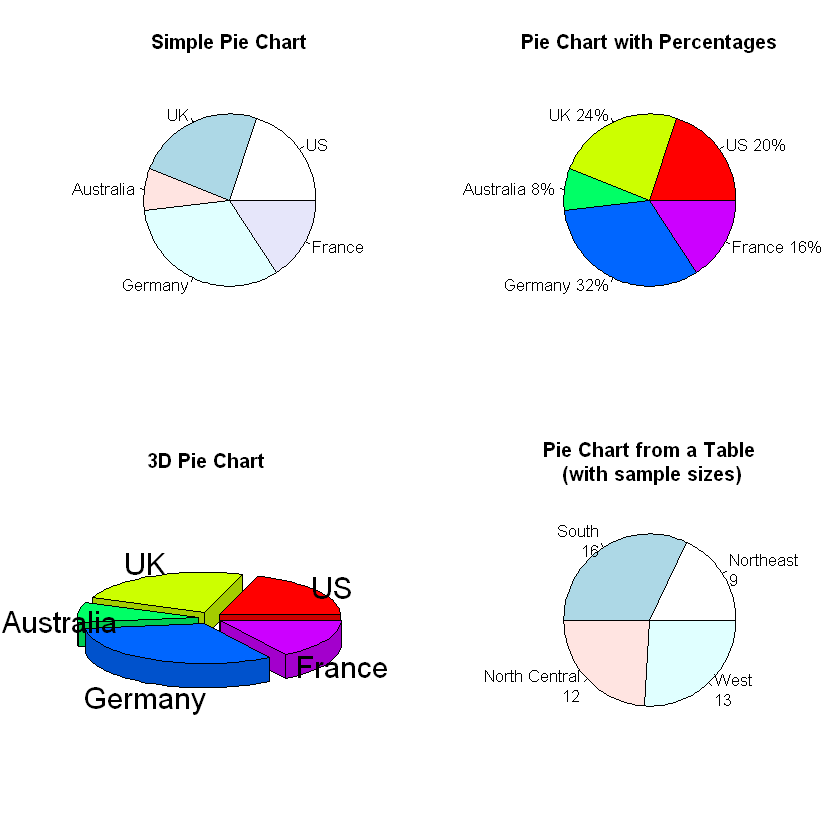

In [16]:
# 6.2 饼图
# install.packages("plotrix")
par(mfrow=c(2, 2))# 将四幅图形组合为一幅
slices <- c(10, 12,4, 16, 8)
lbls <- c("US", "UK", "Australia", "Germany", "France")
pie(slices, labels = lbls,
 main="Simple Pie Chart")

pct <- round(slices/sum(slices)*100)
lbls2 <- paste(lbls, " ", pct, "%", sep="")
pie(slices, labels=lbls2, col=rainbow(length(lbls2)),
 main="Pie Chart with Percentages")# 为饼图添加比例数值

library(plotrix)
pie3D(slices, labels=lbls,explode=0.1,
 main="3D Pie Chart ")
mytable <- table(state.region)
lbls3 <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels = lbls3,
 main="Pie Chart from a Table\n (with sample sizes)")# 从表格创建饼图

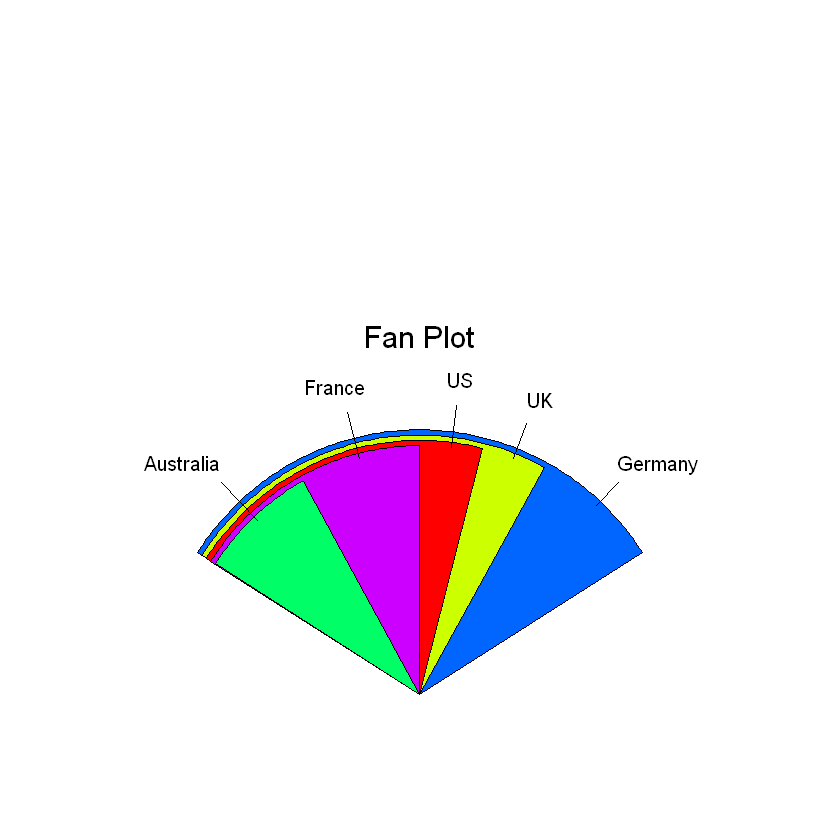

In [17]:
# 扇形图
library(plotrix)
slices <- c(10, 12,4, 16, 8)
lbls <- c("US", "UK", "Australia", "Germany", "France")
fan.plot(slices, labels = lbls, main="Fan Plot") 


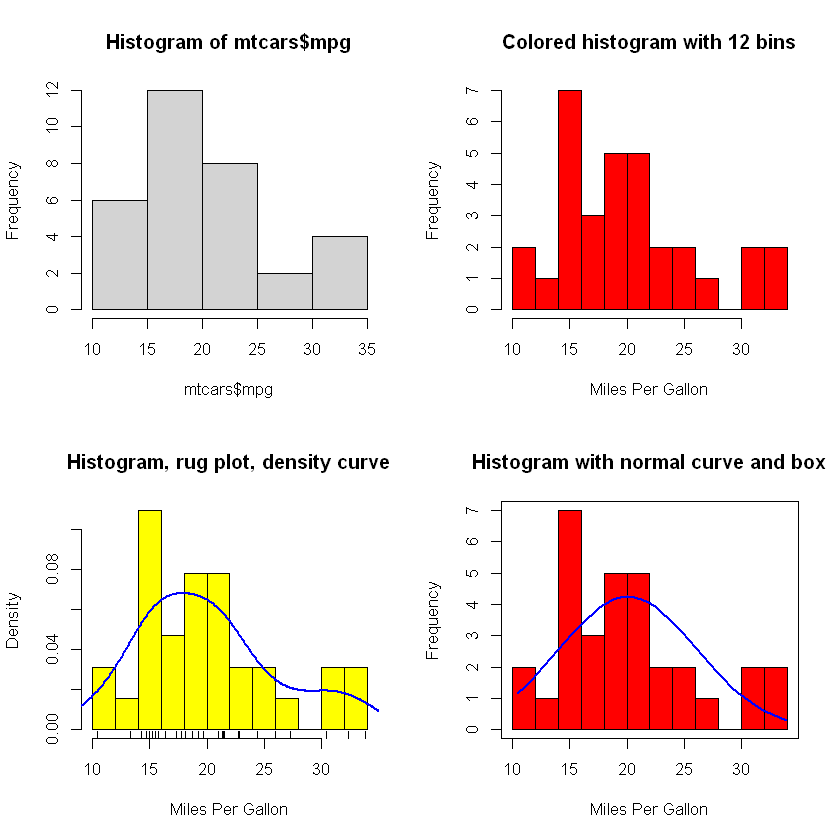

In [19]:
# 6.3 直方图
# 6-6 直方图
par(mfrow=c(2,2))

hist(mtcars$mpg)#简单直方图

hist(mtcars$mpg,
 breaks=12,
 col="red",
 xlab="Miles Per Gallon",
 main="Colored histogram with 12 bins")# 指定组数和颜色

hist(mtcars$mpg,
 freq=FALSE,
 breaks=12,
 col="yellow",
 xlab="Miles Per Gallon",
 main="Histogram, rug plot, density curve")
rug(jitter(mtcars$mpg))
lines(density(mtcars$mpg), col="blue", lwd=2)# 添加轴须图


x <- mtcars$mpg
h<-hist(x,
 breaks=12,
 col="red",
 xlab="Miles Per Gallon",
 main="Histogram with normal curve and box")
xfit<-seq(min(x), max(x), length=40)
yfit<-dnorm(xfit, mean=mean(x), sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)
box() # 添加正态密度曲线和外框

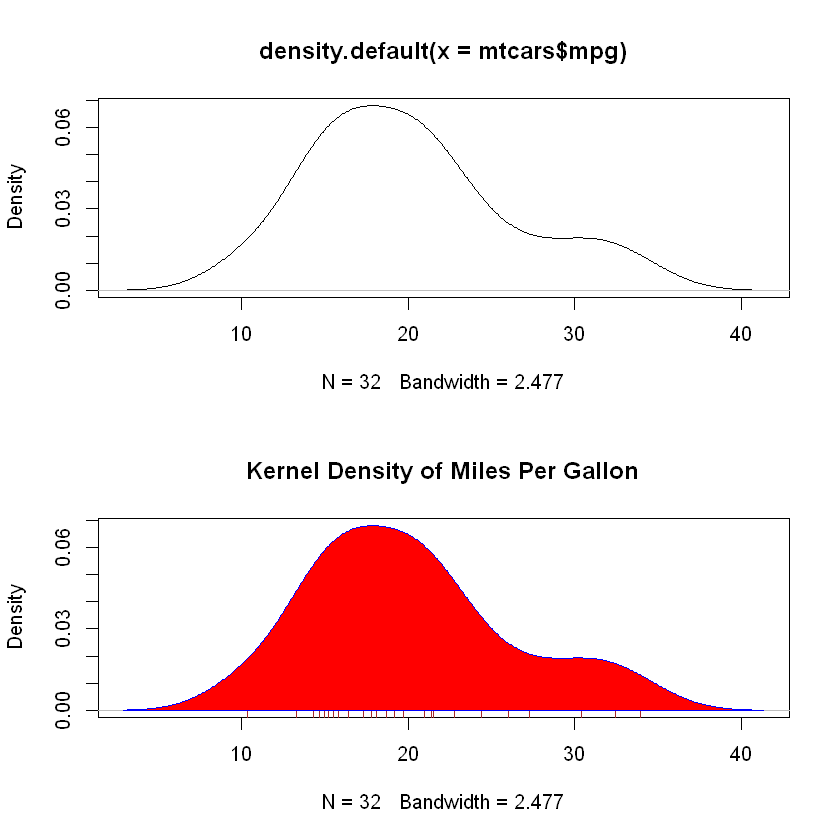

In [20]:
# 6.4 核密度图
# 6-7 核密度图
par(mfrow=c(2,1))
 d <- density(mtcars$mpg)

 plot(d)#完全使用默认设置创建最简图形

 d <- density(mtcars$mpg)
 plot(d, main="Kernel Density of Miles Per Gallon")# 添加一个标题
 polygon(d, col="red", border="blue")# 将曲线修改为蓝色，并使用实心红色填充曲线下方的区域
 rug(mtcars$mpg, col="brown") # 添加棕色的轴须图

Package 'sm', version 2.2-5.7: type help(sm) for summary information



ERROR: Error in legend(locator(1), levels(cyl.f), fill = colfill): invalid coordinate lengths


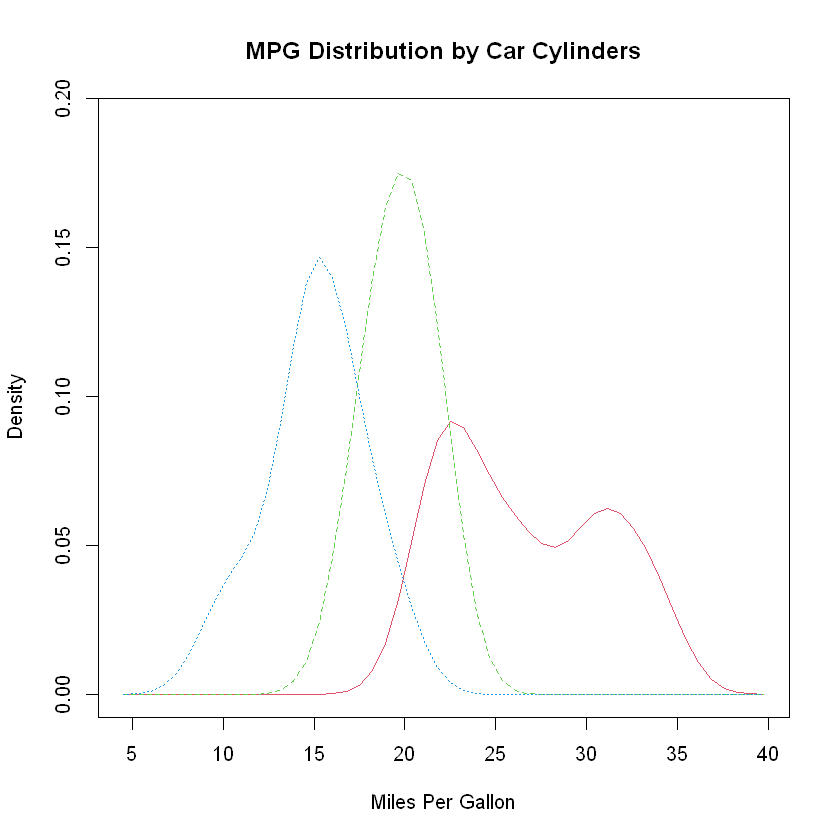

In [22]:
# 6-8 可比较的核密度图\
# install.packages("sm")
library(sm)
attach(mtcars)
cyl.f <- factor(cyl, levels= c(4,6,8),
 labels = c("4 cylinder", "6 cylinder",
 "8 cylinder"))
sm.density.compare(mpg, cyl, xlab="Miles Per Gallon")
title(main="MPG Distribution by Car Cylinders")
colfill<-c(2:(1+length(levels(cyl.f))))
legend(locator(1), levels(cyl.f), fill=colfill)
detach(mtcars)

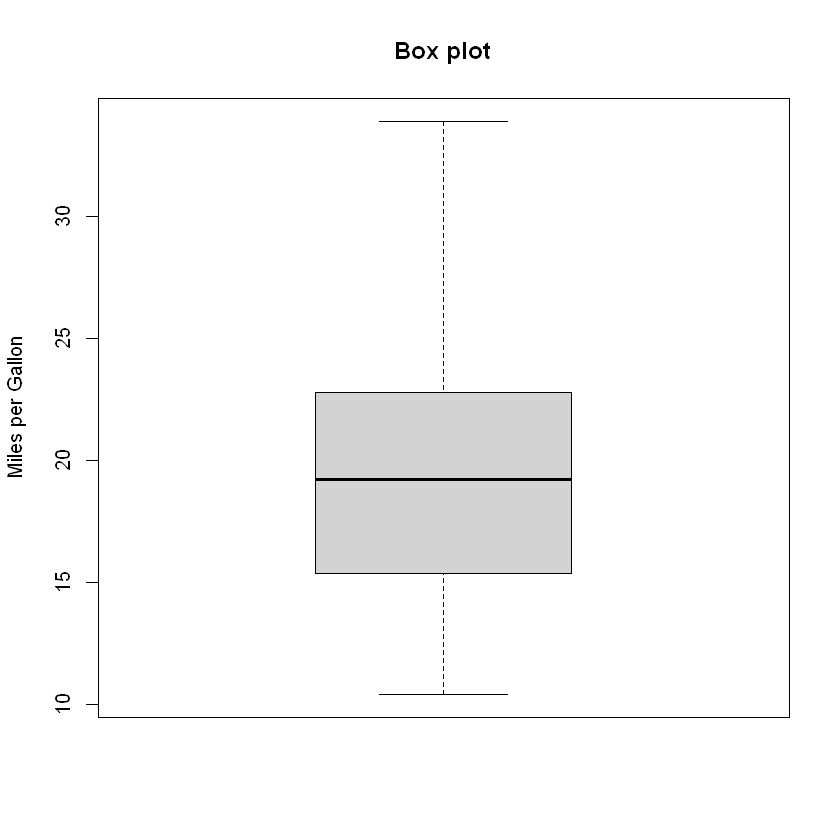

In [24]:
# 6.5 箱线图
boxplot(mtcars$mpg, main="Box plot", ylab="Miles per Gallon") 

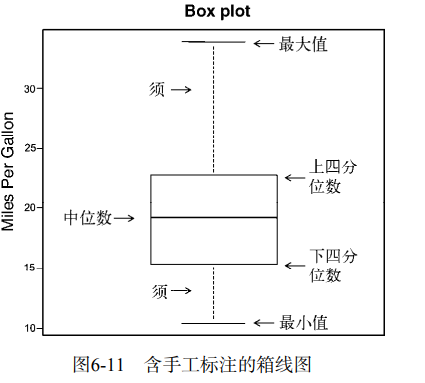

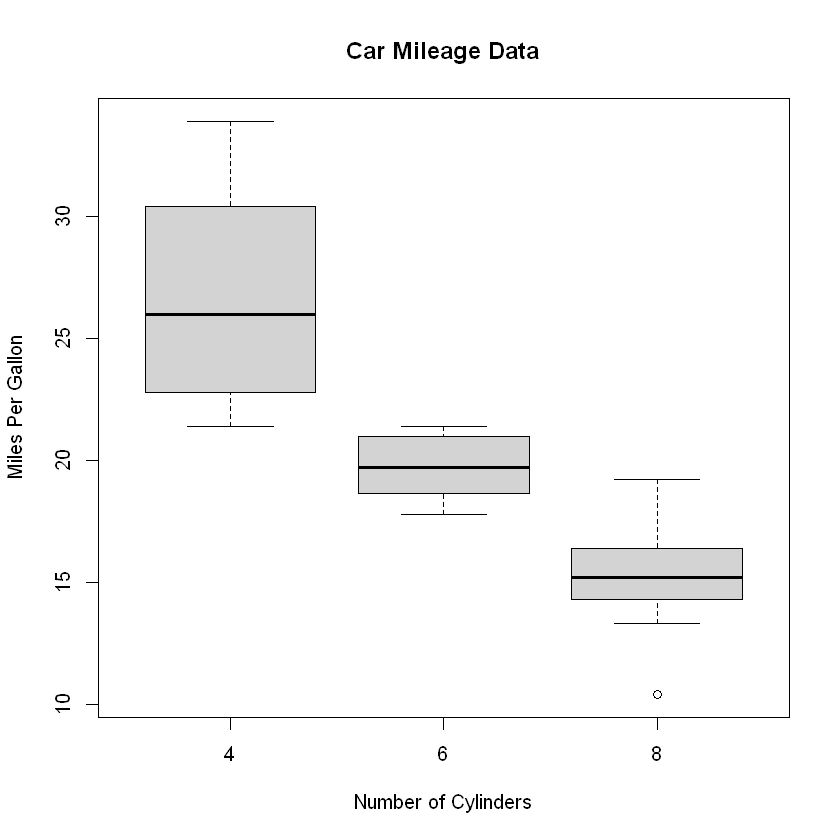

In [25]:
# 6.5.1 使用并列箱线图进行跨组比较
boxplot(mpg ~ cyl, data=mtcars,
 main="Car Mileage Data",
 xlab="Number of Cylinders",
 ylab="Miles Per Gallon") 

Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"


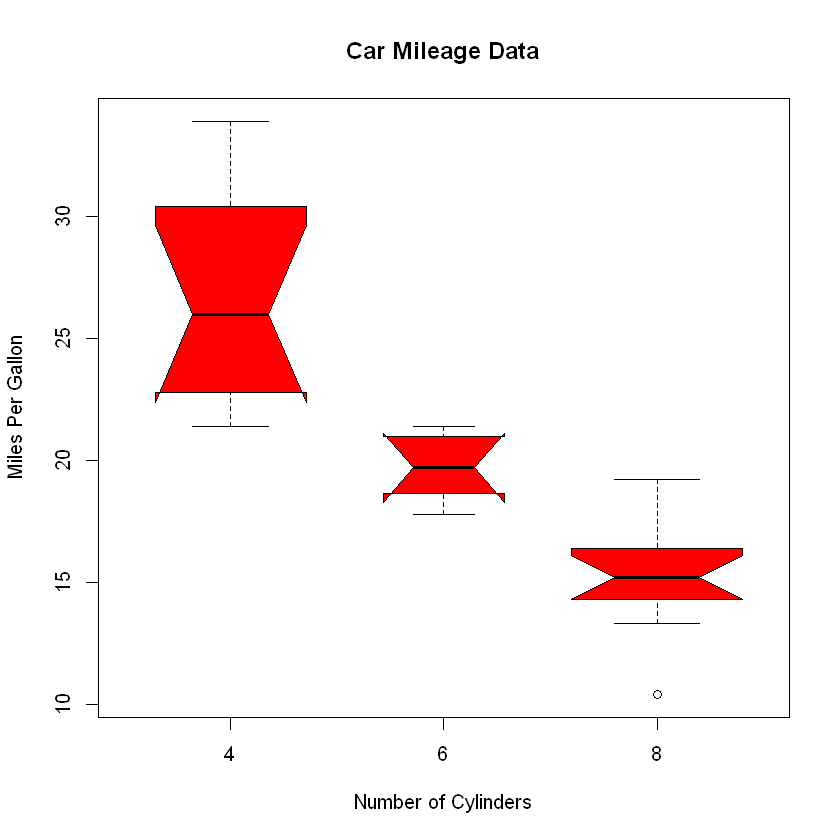

In [26]:
boxplot(mpg ~ cyl, data=mtcars,
 notch=TRUE,
 varwidth=TRUE,
 col="red",
 main="Car Mileage Data",
 xlab="Number of Cylinders",
 ylab="Miles Per Gallon")

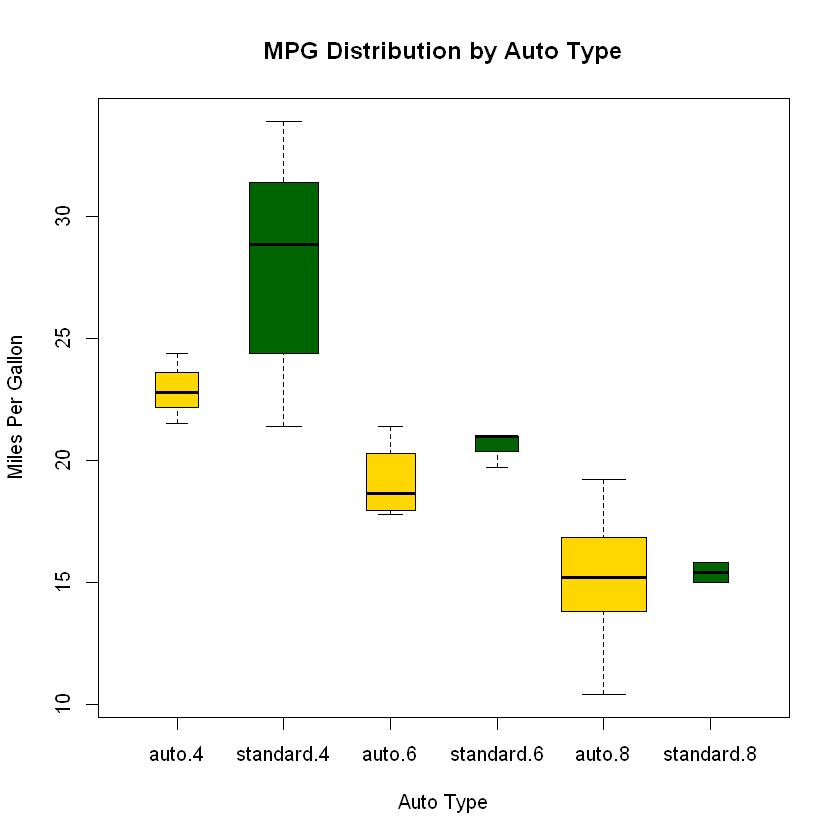

In [27]:
# 6-9 两个交叉因子的箱线图
mtcars$cyl.f <- factor(mtcars$cyl,
 levels=c(4,6,8),
 labels=c("4","6","8"))# 创建汽缸数量的因子

mtcars$am.f <- factor(mtcars$am,
 levels=c(0,1),
 labels=c("auto", "standard"))# 创建变速箱类型的因子

boxplot(mpg ~ am.f *cyl.f,
 data=mtcars,
 varwidth=TRUE,
 col=c("gold","darkgreen"),
 main="MPG Distribution by Auto Type",
 xlab="Auto Type", ylab="Miles Per Gallon")# 生成箱线图

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




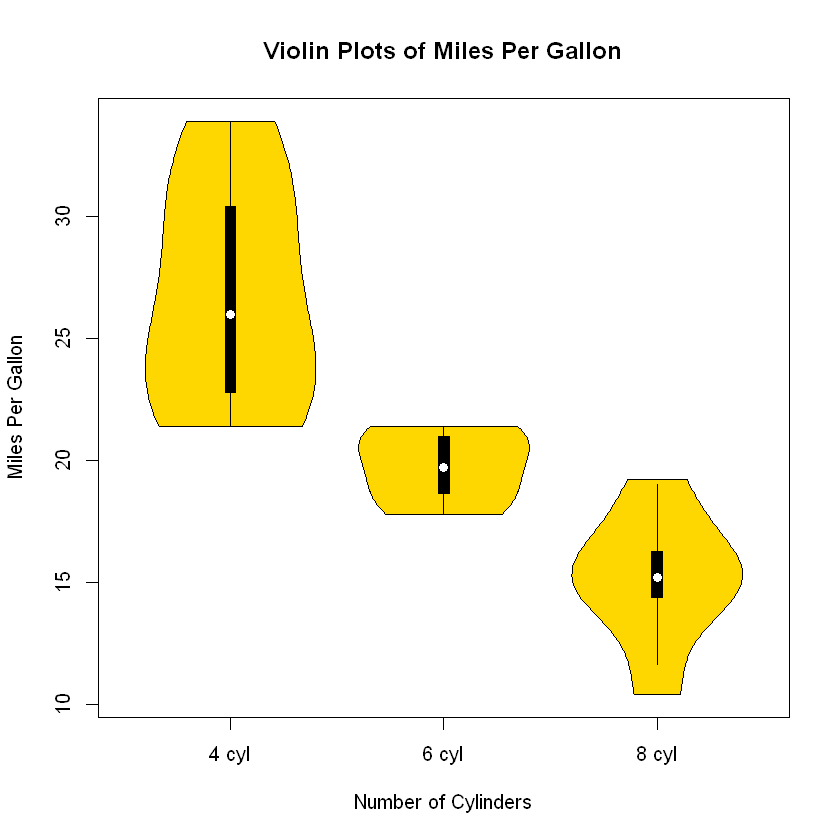

In [29]:
# 6.5.2 小提琴图
# 6-10 小提琴图
# install.packages("vioplot")
library(vioplot)
x1 <- mtcars$mpg[mtcars$cyl==4]
x2 <- mtcars$mpg[mtcars$cyl==6]
x3 <- mtcars$mpg[mtcars$cyl==8]
vioplot(x1, x2, x3,
 names=c("4 cyl", "6 cyl", "8 cyl"),
 col="gold")
title("Violin Plots of Miles Per Gallon", ylab="Miles Per Gallon",
 xlab="Number of Cylinders") 

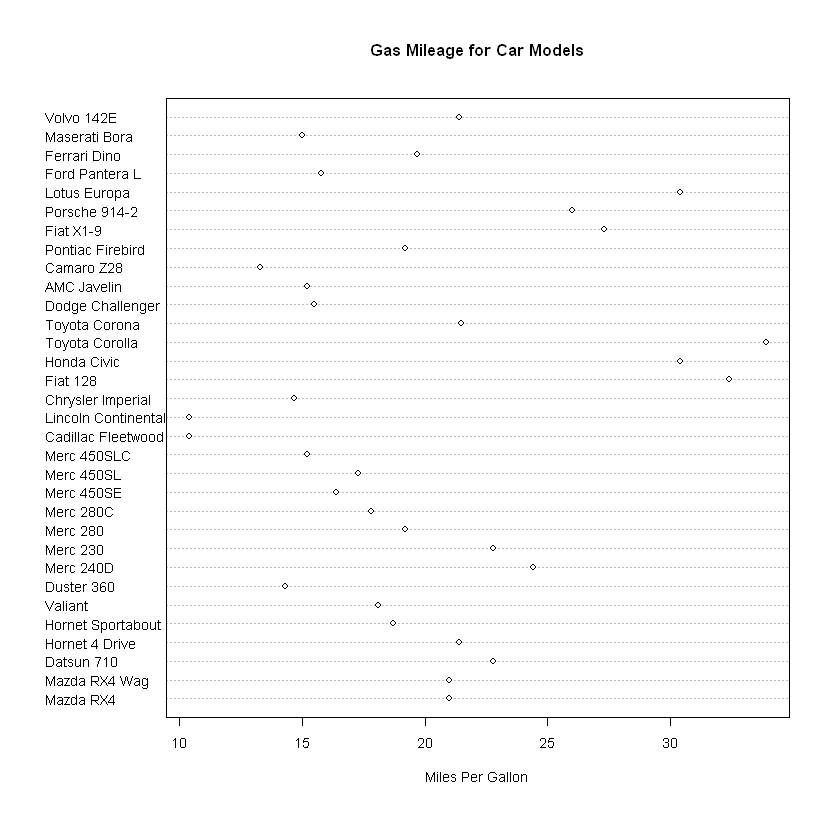

In [30]:
# 6.6 点图
dotchart(mtcars$mpg, labels=row.names(mtcars), cex=.7,
 main="Gas Mileage for Car Models",
 xlab="Miles Per Gallon")

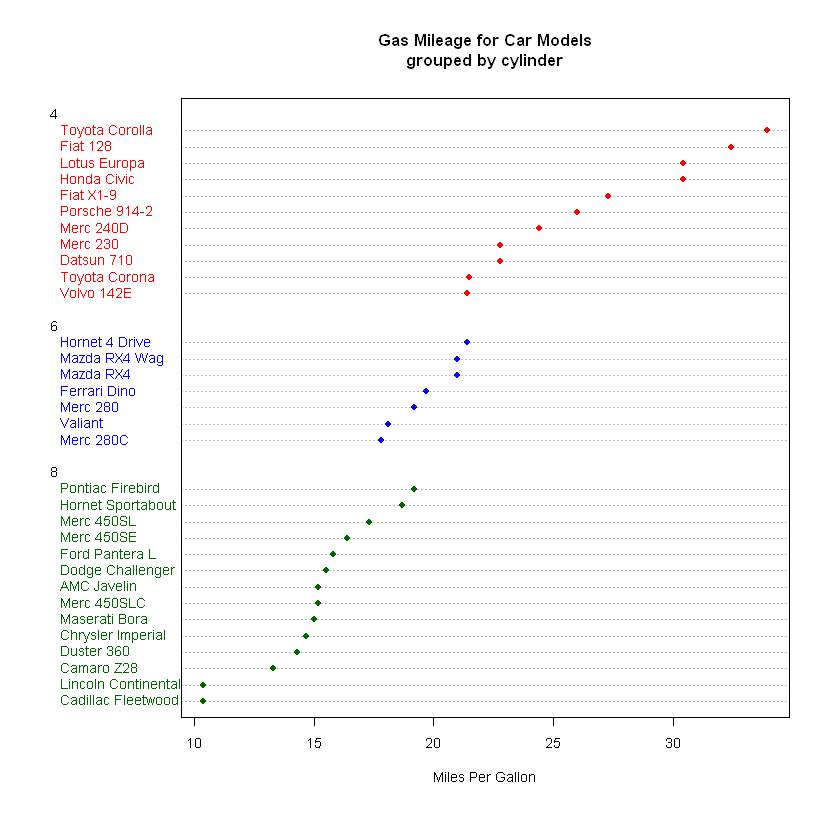

In [32]:
#  6-11 分组、排序、着色后的点图
x <- mtcars[order(mtcars$mpg),]# 根据每加仑汽油行驶英里数（从最低到最高）对数据框mtcars进行排序，结果保存为数据框x

 x$cyl <- factor(x$cyl)# 将数值向量 cyl 转换为一个因子

 x$color[x$cyl==4] <- "red"
 x$color[x$cyl==6] <- "blue"
 x$color[x$cyl==8] <- "darkgreen"# 添加一个字符型向量（color）到数据框x中，根据cyl的值，它所含的值为"red"、"blue"或"darkgreen"
 dotchart(x$mpg,
 labels = row.names(x),# 各数据点的标签取自数据框的行名（车辆型号）
 cex=.7,
 groups = x$cyl,#  数据点根据汽缸数量分组
 gcolor = "black",# 数字4、6和8以黑色显示
 color = x$color,# 点和标签的颜色来自向量color

 pch=19,
 main = "Gas Mileage for Car Models\ngrouped by cylinder",
 xlab = "Miles Per Gallon")